![](https://www.nydailynews.com/resizer/0cDtqYztGY7aePTmeVdAdDCkLN8=/800x532/top/arc-anglerfish-arc2-prod-tronc.s3.amazonaws.com/public/5DHBFCGBWJFZFBEE3NWGUAKFAY.jpg)

# <p style="text-align: center;"> Crime in Context, 1975-2015 </p>
## <p style="text-align: center;"> Are violent crime rates rising or falling in American cities? </p>
#### <p style="text-align: right;"> Made by Ihor Markevych </p>

## Table of content

1. [**Objective of the Proposed Research**](#objective)
1. [**Data Exploration**](#de)
1. [**Plot**](#plot)
1. [**Summary**](#summary)
1. [**Recommendations**](#recommendations)

<a id='objective'></a>

## Objective of the Proposed Research

We want to conduct research on [crimes dataset](https://www.kaggle.com/marshallproject/crime-rates) and analyze data to find answers to questions about crime in different regions across the years.  
Research will be focused on comparing different agencies and states in terms of crime percapita and violent crimes. Other types of crimes will also be investigated.  
  
We'll investigate each type of crime separately and answer next questions. Those question will be researched from historical point of view, so, research will be conducted on both modern and historical data. 
What are the biggest and smallest values for each type of the crime in dataset, such as violent crimes, homicides, rapes, assaults and robberies?   
  
What are the safest states to live in and how much worse the situation is in the most dangerous states? Which states are the most dangerous and so, should have more attention from law enforcement?  
Which cities have most crimes per capita and what is other available data about them?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
d = pd.read_csv('./data/report.csv')

<a id='de'></a>

## Data Exploration

Let's see first 10 rows of dataset.

In [3]:
d.iloc[:10]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
5,1975,MD00301,"Baltimore County, MD",642154.0,1259.0,25.0,137.0,347.0,750.0,12.0,196.06,3.89,21.33,54.04,116.79
6,1975,MDBPD00,"Baltimore, MD",864100.0,16086.0,259.0,463.0,6309.0,9055.0,12.0,1861.59,29.97,53.58,730.12,1047.91
7,1975,MA01301,"Boston, MA",616120.0,11386.0,119.0,453.0,3036.0,7778.0,12.0,1848.02,19.31,73.52,492.76,1262.42
8,1975,NY01401,"Buffalo, NY",422276.0,3350.0,63.0,192.0,755.0,2340.0,12.0,793.32,14.92,45.47,178.79,554.14
9,1975,NC06001,"Charlotte, NC",262103.0,1937.0,68.0,71.0,976.0,822.0,12.0,739.02,25.94,27.09,372.37,313.62


And also check types of values in columns.

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
report_year            2829 non-null int64
agency_code            2788 non-null object
agency_jurisdiction    2829 non-null object
population             2760 non-null float64
violent_crimes         2794 non-null float64
homicides              2795 non-null float64
rapes                  2754 non-null float64
assaults               2753 non-null float64
robberies              2754 non-null float64
months_reported        2692 non-null float64
crimes_percapita       2794 non-null float64
homicides_percapita    2795 non-null float64
rapes_percapita        2754 non-null float64
assaults_percapita     2753 non-null float64
robberies_percapita    2754 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 331.6+ KB


Now we want to know, which agencies do we have.

In [5]:
print(d['agency_jurisdiction'].unique())

['Albuquerque, NM' 'Arlington, TX' 'Atlanta, GA' 'Aurora, CO' 'Austin, TX'
 'Baltimore County, MD' 'Baltimore, MD' 'Boston, MA' 'Buffalo, NY'
 'Charlotte, NC' 'Chicago, IL' 'Cincinnati, OH' 'Cleveland, OH'
 'Columbus, OH' 'Dallas, TX' 'Denver, CO' 'Detroit, MI' 'El Paso, TX'
 'Fairfax County, VA' 'Fort Worth, TX' 'Fresno, CA' 'Honolulu, HI'
 'Houston, TX' 'Indianapolis, IN' 'Jacksonville, FL' 'Kansas City, MO'
 'Las Vegas, NV' 'Long Beach, CA' 'Los Angeles County, CA'
 'Los Angeles, CA' 'Louisville, KY' 'Memphis, TN' 'Mesa, AZ'
 'Miami-Dade County, FL' 'Miami, FL' 'Milwaukee, WI' 'Minneapolis, MN'
 'Montgomery County, MD' 'Nashville, TN' 'Nassau County, NY'
 'New Orleans, LA' 'New York City, NY' 'Newark, NJ' 'Oakland, CA'
 'Oklahoma City, OK' 'Omaha, NE' 'Orlando, FL' 'Philadelphia, PA'
 'Phoenix, AZ' 'Pittsburgh, PA' 'Portland, OR'
 "Prince George's County, MD" 'Raleigh, NC' 'Sacramento, CA'
 'Salt Lake City, UT' 'San Antonio, TX' 'San Diego, CA'
 'San Francisco, CA' 'San Jose, CA' 'S

Let's find percentage of missing values for each column.

In [6]:
d.isnull().sum() * 100 / len(d)

report_year            0.000000
agency_code            1.449275
agency_jurisdiction    0.000000
population             2.439024
violent_crimes         1.237186
homicides              1.201838
rapes                  2.651113
assaults               2.686462
robberies              2.651113
months_reported        4.842701
crimes_percapita       1.237186
homicides_percapita    1.201838
rapes_percapita        2.651113
assaults_percapita     2.686462
robberies_percapita    2.651113
dtype: float64

We almost don't have missing values.

How much rows for each agency do we have?

In [25]:
d['agency_jurisdiction'].value_counts().head(10)

Fort Worth, TX                41
Baltimore County, MD          41
Houston, TX                   41
San Antonio, TX               41
Los Angeles, CA               41
Honolulu, HI                  41
Los Angeles County, CA        41
Oakland, CA                   41
San Francisco, CA             41
Prince George's County, MD    41
Name: agency_jurisdiction, dtype: int64

This is easily explainable by the fact that we have data for 41 years in this dataset. So, we have data for each year for all agencies.

Let's find, which state has most crimes.

_regex magic is happening down there!_

In [8]:
def getState(s:str):
    if(s == 'United States'):
        return float('nan')
    else:
        return re.search('(.+), (..)', s).group(2)

_next cell is mapping dataframe column into another column using function from a cell above to get state of each agency_

In [9]:
d['state'] = d['agency_jurisdiction'].apply(getState)

_then we group our dataset by newly created column to get total quantity of crimes of different types for each state across the years_

In [10]:
states = d.groupby('state')[['violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies']].sum()

Let's see, which dataset we have created by grouping.

In [11]:
states.head()

,violent_crimes,homicides,rapes,assaults,robberies
state,,,,,
AZ,582766.0,7931.0,35954.0,348572.0,190309.0
CA,3990220.0,51317.0,164424.0,2093002.0,1681477.0
CO,247616.0,3255.0,22848.0,138549.0,82964.0
DC,433937.0,9889.0,12195.0,187757.0,224096.0
FL,1503422.0,16424.0,61717.0,879203.0,551137.0


_we have created new dataframe using grouping from original one. this dataframe has total number of crimes by type for each state for all years_

###### Agencies with most crimes percapita for year 2015:

In [12]:
topCrimes = d.loc[d['report_year'] == 2015].nlargest(5, ['crimes_percapita'])  
topCrimes

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,state
2820,2015,MOSPD00,"St. Louis, MO",317095.0,5762.0,188.0,263.0,3521.0,1790.0,NaN,1817.12,59.29,82.94,1110.39,564.50,MO
2776,2015,MI82349,"Detroit, MI",673225.0,11846.0,295.0,530.0,7564.0,3457.0,NaN,1759.59,43.82,78.73,1123.55,513.50,MI
2791,2015,TNMPD00,"Memphis, TN",657936.0,11449.0,135.0,530.0,7653.0,3131.0,NaN,1740.14,20.52,80.55,1163.18,475.88,TN
2795,2015,WIMPD00,"Milwaukee, WI",600400.0,9583.0,145.0,436.0,5253.0,3749.0,NaN,1596.10,24.15,72.62,874.92,624.42,WI
2766,2015,MDBPD00,"Baltimore, MD",621252.0,9542.0,344.0,287.0,4598.0,4313.0,NaN,1535.93,55.37,46.20,740.12,694.24,MD


In [13]:
print(topCrimes['agency_jurisdiction'].unique())

['St. Louis, MO' 'Detroit, MI' 'Memphis, TN' 'Milwaukee, WI'
 'Baltimore, MD']


As we can see, St. Louis and Detroit are very crimed comparing to other agencies.

###### States with most total violent crimes:

In [14]:
topStates = states.nlargest(10, ['violent_crimes']) 
topStates

,violent_crimes,homicides,rapes,assaults,robberies
state,,,,,
NY,4590104.0,51176.0,117972.0,1943436.0,2477520.0
CA,3990220.0,51317.0,164424.0,2093002.0,1681477.0
TX,2209217.0,37799.0,137803.0,1107664.0,925951.0
IL,1960886.0,27727.0,90209.0,951805.0,891145.0
FL,1503422.0,16424.0,61717.0,879203.0,551137.0
MD,1136606.0,15927.0,43335.0,574301.0,503043.0
PA,921855.0,16652.0,44873.0,361437.0,498893.0
MI,918003.0,19497.0,40857.0,420940.0,436709.0
MO,691160.0,11527.0,28041.0,388511.0,263081.0


In [15]:
print(topStates.index.values)

['NY' 'CA' 'TX' 'IL' 'FL' 'MD' 'PA' 'MI' 'MO' 'OH']


So, NY and CA are the most crimed states not only for violent crimes, but for homicides, rapes, assaults and robberies. Twice as much crimes as in other states.

###### Let's find data about agencies with most crimes percapita:

In [16]:
mostCrimes = d.sort_values(by=['crimes_percapita'], ascending=False) \
    [['agency_jurisdiction', 'violent_crimes', 'homicides', 'assaults', 'robberies']]
mostCrimes.head(10)

,agency_jurisdiction,violent_crimes,homicides,assaults,robberies
1069,"Miami, FL",15607.0,129.0,7007.0,8172.0
1138,"Miami, FL",15420.0,125.0,6582.0,8477.0
1037,"Atlanta, GA",16097.0,231.0,9062.0,6109.0
1106,"Atlanta, GA",16327.0,205.0,8967.0,6479.0
1244,"Atlanta, GA",16281.0,203.0,9541.0,6045.0
1422,"Newark, NJ",10371.0,102.0,4573.0,5480.0
968,"Atlanta, GA",16852.0,246.0,9119.0,6796.0
1276,"Miami, FL",14502.0,127.0,7089.0,7082.0
1077,"Newark, NJ",10684.0,112.0,4225.0,6021.0
1302,"St. Louis, MO",14998.0,267.0,8189.0,6223.0


We can see that most crimed cities during history were Miami, Atlanta and Newark, St. Louis.  
We can see number of different types of crime for those cities from a table above.

###### Let's find maximum and minimum values of different types of crime:

In [17]:
print(f"Maximum number of violent crimes is {d['violent_crimes'].max()}.")
print(f"Minimum number of violent crimes is {d['violent_crimes'].min()}.")

Maximum number of violent crimes is 1932274.0.
Minimum number of violent crimes is 154.0.


In [18]:
print(f"Maximum number of homicides is {d['homicides'].max()}.")
print(f"Minimum number of homicides is {d['homicides'].min()}.")

Maximum number of homicides is 24703.0.
Minimum number of homicides is 1.0.


In [19]:
print(f"Maximum number of assaults is {d['assaults'].max()}.")
print(f"Minimum number of assaults is {d['assaults'].min()}.")

Maximum number of assaults is 71030.0.
Minimum number of assaults is 15.0.


In [20]:
print(f"Maximum number of robberies is {d['robberies'].max()}.")
print(f"Minimum number of robberies is {d['robberies'].min()}.")

Maximum number of robberies is 107475.0.
Minimum number of robberies is 83.0.


So, we have investigated maximum and minimum of different types of crimes during those years. As we can see, difference is very big.  
Smallest maximum number is for homicides, while biggest maximum is for violent crimes.

###### For which years do we have data?

In [21]:
print(f"""We have data for {d['report_year'].max() - d['report_year'].min() + 1} years. 
From {d['report_year'].min()} to {d['report_year'].max()}.""")

We have data for 41 years. 
From 1975 to 2015.


<a id='plot'></a>

## Plot

###### Let's visualize total number of violent crimes for each state:

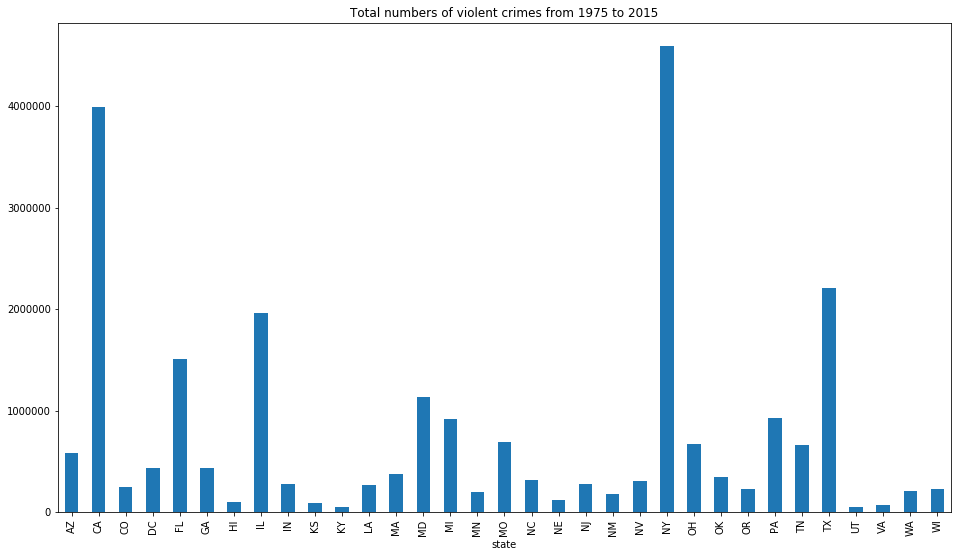

In [22]:
states['violent_crimes'].plot.bar(figsize=(16,9))
plt.title("Total numbers of violent crimes from 1975 to 2015")
plt.show()

From this chart is is easy to compare states (and select safest one for living!).
As we can see, safest states are:
- CO,
- HI,
- KS,
- KY,
- NE,
- UT,
- VA;
  
We can also compare how worse is crime situation in CA and NY comparing to other states. In FL, IL and TX crime rate is also big.

<a id='summary'></a>

## Summary

During the research next important points were found:
  
- data is available for 40 years,
    - from 1975 
    - to 2015;
  
  
- agencies, located in a most crimed regions fro year 2015 are:
    - St. Louis, MO,
    - Detroit, MI,
    - Memphis, TN, 
    - Milwaukee, WI,
    - Baltimore, MD;
  
- the most crimed states for all types of crime are
        - NY and
        - CA,
    - with twice as much total crimes comparing to other states;
  
  
- safest states are:
    - CO,
    - HI,
    - KS,
    - KY,
    - NE,
    - UT,
    - VA;
  
      
- Violent crimes:
    - maximum number is 1932274.0.
    - minimum number is 154.0.
- Homicides:    
    - maximum number is 24703.0.
    - minimum number is 1.0.
- Assaults:    
    - maximum number is 71030.0.
    - minimum number is 15.0.
- Robberies:
    - maximum number is 107475.0.
    - minimum number is 83.0.
    

<a id='recommendations'></a>

## Recommendations

After conducting this research, next recommendations can be made.  
  
More attention in terms of law enforcement should be made for CA and NY states, since they have more than twice as much crimes as in other states. To be more specific, NY has around 460,000 violent crimes total, while CA has around 400,000 violent crimes total. In FL, IL and TX crime rate is also big, but smaller, than in CA and NY.   
  
However, such states, as CO, HI, KS, KY, NE, UT and VA are least dangerous states and so, they can be on lowest priority for law enforcement.   
  
To be more specific, St. Louis and Detroit agencies experienced high crime level (around 4,000 crimes per capita) in year 2015, so, there is sense in devoting more budget to those agencies.  

Smallest maximum number of crime of different types for those years is for homicides, while biggest maximum is for violent crimes. So, police should be more careful about violent crimes.

Next bar chart can be used as a visualization for comparing, how much worse is the crime situation in CA and NY and how good situation is in some other states.  
  
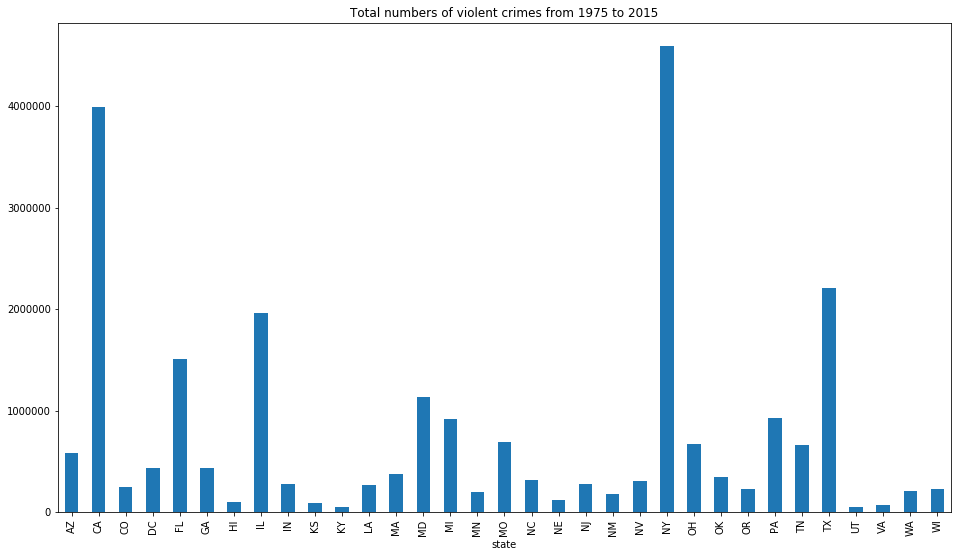
